In [3]:
%matplotlib inline
%precision 16
from __future__ import print_function
from six.moves import range
import numpy
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy.linalg
import scipy.sparse.linalg as linalg

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 5: Parabolic Problems

# Question 1 - Parabolic + Periodic BCs

Consider the temperature distribution in a thin circular ring with perimeter $2L$. Assume that the lateral surfaces are perfectly insulated, such that the temperature is distributed evenly throughout the ring cross-section and that the ends at $x=-L$ and $x=L$ are in perfect thermal contact.

This mathematical problem can be formulated as a heat equation with factor $k \in \mathbb R$ and periodic boundary conditions.
$$
    \frac{\partial u}{\partial t} = k \ \frac{\partial^2 u}{\partial x^2} \qquad \mbox{on } [-L,L]\times \mathbb R_+\\
    u(x,0) = u_0(x) ~~~~~~ u(-L,t) = u(L,t) ~~~~~ \frac{\partial}{\partial x} u(-L,t) = \frac{\partial}{\partial x} u(L,t).
$$

**(a)** [10] Solve the problem analytically.

### Solution:

Using separation of variables, let $u(x,t) = \phi(x)G(t)$. Substituting $u(x,t)$ gives us two separate ODEs:

$$
\frac{dG}{dt} = -\lambda kG \\
\frac{d^2\phi}{dx^2} = -\lambda \phi
$$

where $\lambda$ is the separation constant. Solving the time ODE:

$$
\frac{dG}{dt} = \lambda kG \\
\implies \frac{1}{G}\frac{dG}{dt} = -\lambda k \\
\implies ln(G) = -\lambda kt + c \\
\implies G(t) = ce^{-\lambda kt}
$$

Now solving $\frac{d^2\phi}{dx^2} = -\lambda \phi$ with the specified boundary conditions with $\lambda > 0$ we get:

$$
\phi = c_1 \cos\sqrt{\lambda}x + c_2 \sin\sqrt{\lambda}x
$$

Using $\phi(-L) = \phi(L)$ and that sine is an odd function and cosine is even, we get that:

$$
c_2 \sin\sqrt{\lambda}L = 0
$$

Using the other BC: $\frac{d\phi}{dx}=\sqrt{\lambda}\left(-c_1 \sin\sqrt{\lambda}x + c_2 \cos\sqrt{\lambda}x\right)$, BC is satisfied if:

$$
c_1 \sqrt{\lambda}\sin\sqrt{\lambda}L = 0
$$

To avoid trivial solutions we need that $c_1 \neq 0$ so we get that $\sin\sqrt{\lambda}L = 0$ which gives us:

$$
\lambda = \left(\frac{n\pi}{L}\right)^2
$$

We now have that:

$$
\phi(x) = \cos\frac{n\pi x}{L},\sin\frac{n\pi x}{L},n=1,2,3,\ldots
$$

Combining the two infinite families of product solutions and applying the principle of superposition, our solution is:

$$
u(x,t) = a_0 + \sum_{n=1}^{\infty} a_n \cos\frac{n\pi x}{L}e^{-\left(\frac{n\pi}{L}\right)^2 kt}
+\sum_{n=1}^{\infty} b_n \sin\frac{n\pi x}{L}e^{-\left(\frac{n\pi}{L}\right)^2 kt}
$$

With our initial condition $u(x,0) = f(x)$, we get:

$$u_0(x) = a_0 + \sum_{n=1}^{\infty} a_n \cos\frac{n\pi x}{L} + \sum_{n=1}^{\infty} b_n \sin\frac{n\pi x}{L}$$

We can get $a_0$, $a_n$, and $b_n$ using orthogonality of sines and cosines:

$$
a_0 = \frac{1}{2L}\int_{-L}^{L}u_0(x) dx \\
a_n = \frac{1}{L}\int_{-L}^{L}u_0(x) \cos\frac{n\pi x}{L} dx \\
b_n = \frac{1}{L}\int_{-L}^{L}u_0(x) \sin\frac{n\pi x}{L} dx
$$

**(b)** [10] Write down the discretization for the problem resulting from using the Crank-Nicholson method showing the full matrix representation of the discretization and how you came to that representation.  Note that the periodicity will cause there to be a dependence that "wraps around" the domain so that the left most point in the domain depends on the right most point and vice-versa.

### Solution:

Our boundary conditions are:

$$
u(-L,t) = u(L,t) ~~~~~ \frac{\partial}{\partial x} u(-L,t) = \frac{\partial}{\partial x} u(L,t)
$$

First-order Centered Differences:
$$

$$

Crank-Nicholson Method for reference:
$$
    -r U^{n+1}_{i-1} + (1 + 2r) U^{n+1}_i - r U^{n+1}_{i+1} = r U^{n}_{i-1} + (1 - 2r) U^{n}_{i} + r U^{n}_{i+1}
$$
where $r = \frac{\Delta t}{2 \Delta x^2}$

From first-order finite differences:

$$
\frac{U_1 - U_0}{\Delta x} = \frac{U_0 - U_m}{\Delta x}
$$

Which gives us:
$$
U_0 = \frac{U_1 + U_m}{2}
$$

At $i=0$:

$$
A = \frac{1}{2}(U_1 + U_m)
$$

At $i=m$:

$$
A = -rU_{m-1} + (1 + \frac{3}{2}U_m) - \frac{r}{2}U_1 
$$

$$
B = rU_{m-1} + (1 - \frac{3}{2}U_m) + \frac{r}{2}U_1 
$$

$$
    A = \begin{bmatrix}
        1+\frac{3}{2}r & -r-\frac{r}{2} \\
        -r & 1+\frac{3}{2}r - \frac{r}{2} & 0 \\
        & -r - \frac{r}{2} & 1+\frac{3}{2}r & 0 \\
        & & \ddots & \ddots & \ddots \\
        & & & -r & 1+\frac{3}{2}r & 0 \\
        & & & & -r & 1+\frac{3}{2}r
    \end{bmatrix}
$$


**(c)** [10] Write a function to solve this problem using the Crank-Nicholson method.

In [91]:
def solve_heat_periodic_CN(m, kappa, L, t_0, t_final, U_0):
    """Solve the heat equation on a periodic domain using Crank-Nicholson
    
    :Input:
     - *m* (int) Number of points use to discretize the domain.  Note that
       the total number of points is *m+1*.
     - *kappa* (float) Diffusion coefficient
     - *L* (float) Length of half of the domain
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0, should be m+1
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.  Note that this vector should m+1
    """
    # YOUR CODE HERE

    delta_x = L/float(m+1)
    
    N = 500
    t = numpy.linspace(t_0, t_final, N)
    delta_t = t[1] - t[0]
  
    # Solution array
    U = numpy.empty((len(t),m+1))
 
    # Initial and boundary conditions  
    U[0,:] = U_0
    
   
    # Build solving matrix
    r = numpy.ones(m+2) * (kappa*delta_t) / (2.0 * delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    # Build matrix for the right hand side computation
    B = sparse.spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  m, m).tocsr()

    # Time stepping loop 
    for n in range(len(t)-1):
        # Construct right-hand side
        b = B.dot(U[n,:][0:-1])
        b[0] += kappa*delta_t / (2.0 * delta_x**2) * (g_0(t[n]) + g_0(t[n+1]))
        b[-1] += kappa*delta_t / (2.0 * delta_x**2) * (g_1(t[n]) + g_1(t[n+1]))
        
        # Solve system
        U[n+1,:][0:-1] = linalg.spsolve(A,b) 
    
    return U[n+1,:]

In [92]:
L = numpy.pi
kappa = 0.075
u_true = lambda x, t: 6.0 * numpy.sin(2.0 * numpy.pi / L * x) * numpy.exp(-4.0 * kappa * (numpy.pi / L)**2 * t) + 3.0

# Discretization and output times
# Note that there are m unknowns including one of the points either at 0 or L
m = 200
delta_x = (2.0 * L) / float(m + 1)
x = numpy.linspace(-L, L, m + 2)
x_fine = numpy.linspace(-L, L, 100)
output_times = (0.0, 2.5, 5.0, 7.5, 10.0)

# Solve
U = numpy.empty((len(output_times), m + 1))
U[0, :] = u_true(x[:-1], 0.0)
for (n, t) in enumerate(output_times[1:]):
    U[n + 1, :] = solve_heat_periodic_CN(m, kappa, L, output_times[n], t, U[n, :])

error = numpy.linalg.norm(delta_x * (U[-1, :] - u_true(x[:-1], output_times[-1])), ord=1)
print("Error = %s" % error)
assert error < 1e-3
print("Success!")

# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes.plot(x_fine, u_true(x_fine, t), 'k-')
    axes.plot(x[:-1], U[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes.set_xlabel("x")
    axes.set_ylabel("$U_(x,t)$")
    axes.set_title("Solution to Heat Equation")
    axes.set_xlim([-L, L])
    axes.legend()
plt.show()

Error = 1.287646859072221


AssertionError: 

# Question 2 - Diffusion and Decay

Consider the partial differential equation 

$$
    \frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} -\gamma u,
$$

which models a diffusion with parameter $\kappa \in \mathbb R_{>0}$ with decay specified by $\gamma \in \mathbb R_{>0}$.

Consider a $\theta$-method of the form

$$
    U_j^{n+1} = U_j^n + \frac {\kappa \Delta t} {2\Delta x^2} \left( U_{j-1}^n - 2 U_j^n + U_{j+1}^n + U_{j-1}^{n+1} - 2U_j^{n+1}+U_{j+1}^{n+1} \right)-\Delta t\gamma\left( (1-\theta) U^n_j +\theta U_j^{n+1} \right)
$$

where $\theta$ is a parameter.

**(a)** [15] Assume $\kappa = 1 $, by computing the local truncation error, show that this method is $p$th order accurate in time and second order accurate in space, where $p=2$ for $\theta = 0.5$ and $p=1$ otherwise.

### Solution:

Applying Taylor series expansion to our $\theta$-method, and expanding gives us:

$$
u_t(x, t) + u_{tt}(x, t)\frac{\Delta t}{2} + u_{ttt}(x, t)\frac{\Delta t^3}{6} - u_{xx}(x, t) - \frac{\Delta x^2}{12}u_{xxxx}(x, t) + \gamma \Delta tu(x, t) + \theta \Delta t^2 u_t(x, t) + \theta \frac{\Delta t^3}{2}u_{tt}(x, t) = 0
$$

We have $u_t \to u_{xx}$, and ignoring the higher order terms:

$$
\gamma \Delta t u(x, t) + \theta \Delta t^2 u_{xx}(x, t) + \left(\frac{\Delta t}{2} + \frac{\theta\Delta t^3}{2} - \frac{\Delta x^2}{12}\right) u_{xxxx}(x, t)
$$

When $\theta=0.5$, the truncation error is lead by the $\Delta x^2$ term, so $p=2$.

**(b)** [10] Using von Neumann analysis, show that this method is unconditionally stable if $\theta \geq 0.5$.

### Solution:

Rewriting with $z = i \Delta x \xi$  gives us:

$$
U_j^{n+1} = U_j^n + \frac{\Delta t}{2 \Delta x^2}\left(\left(e^{-iz} - 2 + e^{iz}\right)U_j^n + \left(e^{-iz} - 2 + e^{iz}\right)U_j^{n+1}\right) - \Delta t \gamma (1- \theta)U_j^n - \Delta t \gamma \theta U_j^{n+1}
$$

$$ 
=\left(1 + \frac{\Delta t}{2\Delta x^2} \left( e^{-iz} - 2 + e^{iz} - 2\Delta x^2\gamma(1-\theta) \right)  + \frac{\Delta t}{2\Delta x^2} \left( e^{-iz} - 2 + e^{iz} - 2\Delta x^2\gamma\theta \right)g(\xi)\right) U_j^n
$$

$f(z) = e^{-iz} - 2 + e^{iz}$, we get:

$$
g(\xi) = \frac{1 + \frac{\Delta t}{2\Delta x^2}\left(f(z) - 2\Delta x^2 \gamma (1-\theta)\right) }{1 - \frac{\Delta t}{2\Delta x^2}\left(f(z) - 2\Delta x^2 \gamma \theta\right)}
$$

**(c)** [10] Show that, if $\theta = 0$, then the method  is stable provided $\Delta t \leq \frac 2 \gamma$, independent of $\Delta x$.

### Solution:

From previous:

$$
g(\xi) = \frac{1 + \frac{\Delta t}{2\Delta x^2}\left(f(z) - 2\Delta x^2 \gamma \right) }{1 - \frac{\Delta t}{2\Delta x^2}f(z) }  \leq 1
$$

$f(z) \leq 0$ for all $\xi$:

$$
f(z) \leq 0  \implies 1 + \frac{\Delta t}{2\Delta x^2}\left(f(z) - 2\Delta x^2 \gamma \right) \geq g(\xi)
$$

Then:

$$
f(z) - 2\Delta x^2 \gamma < 0 \implies f(z) < -2\Delta x^2 \gamma
$$

Note: $f(z) \geq \frac{-4\Delta t}{\Delta x^2}$. Substituting:

$$ 
\frac{-4\Delta t}{\Delta x^2} \leq -2\Delta x^2 \gamma \implies 
\fbox{$\Delta t \leq \frac{2}{\gamma}$}
$$

## Question 3 - Heat Equation

Consider the heat equation with zero boundary conditions:

$$
    \frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2} \qquad \mbox{on } [0,L]\times \mathbb R_+\\
    u(x,0) = u_0(x) ~~~~~~ u(0,t) = 0 ~~~~~ u(L,t) = 0.
$$

**(a)** [10] Implement the *backward Euler* and *Crank-Nicholson* methods to solve this equation.  You are responsible for picking a $\Delta t$ so that the numerical method has enough accuracy but hits the end time $t_f$ exactly (or as much as this is possible with floating point arithmetic).  Note that making $\Delta t$ too small may harm your accuracy as much as picking one that is too big.

Backwards Euler is:

$$
    \frac{U^{n+1}_i - U^n_i}{\Delta t} = \frac{1}{\Delta x^2} (U^{n+1}_{i-1} - 2 U^{n+1}_i + U^{n+1}_{i+1})
$$

Rewriting:

$$
    U^{n+1}_i = U^n_i + \frac{\Delta t}{\Delta x^2} (U^{n+1}_{i-1} - 2 U^{n+1}_i + U^{n+1}_{i+1}).
$$

We can express this as:

$$
    U^{n+1}_i = U^n_i + \Delta t f(t_{n+1}, U^n_i)
$$

Where:
$$
    f(t_{n+1}, U^n_i) = \frac{1}{\Delta x^2} (U^{n+1}_{i-1} - 2 U^{n+1}_i + U^{n+1}_{i+1})
$$


In [160]:
def solve_heat_BE(m, kappa, L, t_0, t_final, U_0, g_0, g_1):
    """Solve the heat equation using backward Euler and given boundaries
    
    Function will take the necessary number of time steps to reach t_final
    from t_0.  Note that this may mean taking a slightly smaller time step 
    size to hit t_f exactly.
    
    :Input:
     - *m* (int) Number of points use to discretize the domain.  Note that
       the total number of points is *m+1*.
     - *kappa* (float) Diffusion coefficient
     - *L* (float) Length of half of the domain
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0, should be m+1
     - *g_0* (func) Boundary condition at x=0
     - *g_1* (func) Boundary condition at x=L
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.  Note that this vector should m+1
    """
    # YOUR CODE HERE
    delta_x = L / float(m+1)
    
    # generate time mesh
    C = 0.5
    delta_t = C * delta_x
    t = numpy.arange(t_0, t_final, delta_t)
    
    #Time Step
    time_step = math.ceil((t_final - t_0)/delta_t)
    t = numpy.linspace(t_0, t_final, time_step)
    delta_t = t[1] - t[0]

    # Solution array & IC & BC
    U = numpy.empty((len(t), m+2))
    U[0, :] = U_0
    
    r = numpy.ones(m) * (kappa*delta_t) / (delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    # Time stepping loop
    for n in range(len(t) - 1):
    
        b = U[n, :][1:-1]
        
        #BC
        bc1 = g_0(t[n+1])
        bc2 = g_1(t[n+1])
        
        # correct U_n with BCs at ends
        b[0] += (kappa*delta_t) / (delta_x**2) * bc1
        b[-1] += (kappa*delta_t) / (delta_x**2) * bc2
        
        # solve
        U[n+1, :][1:-1] = linalg.spsolve(A, b)
        U[n+1, 0] = bc1 
        U[n+1, -1] = bc2 
    
    return U[n+1, :]

Error BE = 0.00012127666733790264


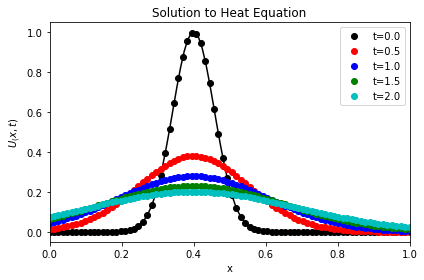

In [161]:
beta = 150.0
kappa = 0.02
L = 1.0
u_true = lambda x, t: numpy.exp(-(x - 0.4)**2. / (4.0 * kappa * t + 1.0 / beta)) \
                                            / numpy.sqrt(4.0 * kappa * beta * t + 1.0)
g_0 = lambda t: u_true(0.0, t)
g_1 = lambda t: u_true(L, t)

# Discretization and output times
m = 80
x = numpy.linspace(0.0, L, m + 2)
x_fine = numpy.linspace(0.0, L, 100)
delta_x = L / float(m + 1)
output_times = (0.0, 0.5, 1.0, 1.5, 2.0)

# Solve
U_BE = numpy.empty((len(output_times), m + 2))
U_BE[0, :] = u_true(x, 0.0)
for (n, t) in enumerate(output_times[1:]):
    U_BE[n + 1, :] = solve_heat_BE(m, kappa, L, output_times[n], t, U_BE[n, :], g_0, g_1)

error = numpy.linalg.norm(delta_x * (U_BE[-1, :] - u_true(x, output_times[-1])), ord=1)
print("Error BE = %s" % error)
assert error < 1e-3

# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes_BE = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_BE.plot(x_fine, u_true(x_fine, t), 'k-')
    axes_BE.plot(x, U_BE[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_BE.set_xlabel("x")
    axes_BE.set_ylabel("$U_(x,t)$")
    axes_BE.set_title("Solution to Heat Equation")
    axes_BE.set_xlim([0, L])
    axes_BE.legend()
    
plt.tight_layout()
plt.show()

In [162]:
import math

def solve_heat_CN(m, kappa, L, t_0, t_final, U_0, g_0, g_1):
    """Solve the heat equation using Crank-Nicholson and given boundaries
    
    Function will take the necessary number of time steps to reach t_final
    from t_0.  Note that this may mean taking a slightly smaller time step 
    size to hit t_f exactly.
    
    :Input:
     - *m* (int) Number of points use to discretize the domain.  Note that
       the total number of points is *m+1*.
     - *kappa* (float) Diffusion coefficient
     - *L* (float) Length of half of the domain
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0, should be m+1
     - *g_0* (func) Boundary condition at x=0
     - *g_1* (func) Boundary condition at x=L
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.  Note that this vector should m+1
    """
    # YOUR CODE HERE
  
    delta_x = 1/float(m+1)
    
    N = 500
    t = numpy.linspace(t_0, t_final, N)
    delta_t = t[1] - t[0]

  
    # Solution array
    U = numpy.empty((len(t),m+2))

  
    # Initial and boundary conditions  
    U[0,:] = U_0
    U[0,0] = g_0(0)
    U[0,-1] = g_1(0)
    
    
    # Build solving matrix
    r = numpy.ones(m+2) * (kappa*delta_t) / (2.0 * delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    # Build matrix for the right hand side computation
    B = sparse.spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  m, m).tocsr()

    # Time stepping loop 
    for n in range(len(t)-1):
        # Construct right-hand side
        b = B.dot(U[n,:][1:-1])
        b[0] += kappa*delta_t / (2.0 * delta_x**2) * (g_0(t[n]) + g_0(t[n+1]))
        b[-1] += kappa*delta_t / (2.0 * delta_x**2) * (g_1(t[n]) + g_1(t[n+1]))
        
        # Solve system
        U[n+1,:][1:-1] = linalg.spsolve(A,b)
        U[n+1, 0] = g_0(t[n+1]) 
        U[n+1, -1] = g_1(t[n+1]) 
    
    return U[n+1,:]

Error CN = 0.000306461708344048
Success!


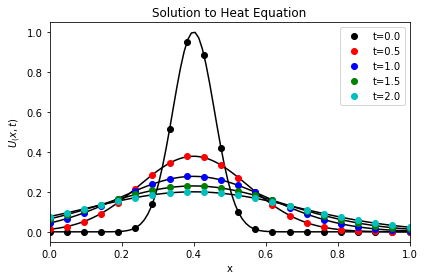

In [163]:
beta = 150.0
kappa = 0.02
L = 1.0
u_true = lambda x, t: numpy.exp(-(x - 0.4)**2. / (4.0 * kappa * t + 1.0 / beta)) \
                                            / numpy.sqrt(4.0 * kappa * beta * t + 1.0)
g_0 = lambda t: u_true(0.0, t)
g_1 = lambda t: u_true(L, t)

# Discretization and output times
m = 20
x = numpy.linspace(0.0, L, m + 2)
x_fine = numpy.linspace(0.0, L, 100)
delta_x = L / float(m + 1)
output_times = (0.0, 0.5, 1.0, 1.5, 2.0)

# Solve
U_CN = numpy.empty((len(output_times), m + 2))
U_CN[0, :] = u_true(x, 0.0)
for (n, t) in enumerate(output_times[1:]):
    U_CN[n + 1, :] = solve_heat_CN(m, kappa, L, output_times[n], t, U_CN[n, :], g_0, g_1)

error = numpy.linalg.norm(delta_x * (U_CN[-1, :] - u_true(x, output_times[-1])), ord=1)
print(("Error CN = %s" % error))
assert error < 1e-3
print("Success!")

# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes_CN = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_CN.plot(x_fine, u_true(x_fine, t), 'k-')
    axes_CN.plot(x, U_CN[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_CN.set_xlabel("x")
    axes_CN.set_ylabel("$U_(x,t)$")
    axes_CN.set_title("Solution to Heat Equation")
    axes_CN.set_xlim([0, L])
    axes_CN.legend()

plt.tight_layout()
plt.show()

**(b)** [5] Perform a convergence analysis on the methods above (i.e. plot their convergence).

### Solution

It appears that both plots converge. The only difference is that the Backwards Euler appears to have a larger error before converging.

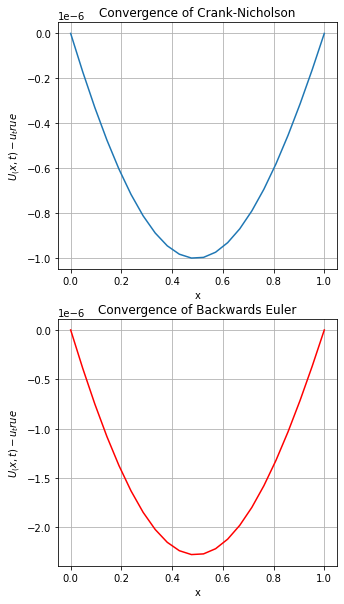

In [165]:
beta = 150.0
kappa = 0.02
L = 1.0
u_true = lambda x, t: numpy.exp(-(x - 0.4)**2. / (4.0 * kappa * t + 1.0 / beta)) \
                                        / numpy.sqrt(4.0 * kappa * beta * t + 1.0)
g_0 = lambda t: u_true(0.0, t)
g_1 = lambda t: u_true(L, t)
m = 20
x = numpy.linspace(0.0, L, m + 2)
delta_x = L / float(m + 1)
t_final = 50


fig = plt.figure(figsize=(5,10))
axes = fig.add_subplot(2, 1, 1)
axes.plot(x, u_true(x,t_final) - solve_heat_CN(m, kappa, L, 0, t_final, u_true(x, 0.0), g_0, g_1))
axes.set_xlabel("x")
axes.set_ylabel("$U_(x,t)-u_true$")
axes.set_title("Convergence of Crank-Nicholson")
axes.grid()
axes = fig.add_subplot(2,1,2)
axes.plot(x, u_true(x,t_final) - solve_heat_BE(m, kappa, L, 0, t_final, U_0, g_0, g_1),'r')
axes.set_xlabel("x")
axes.set_ylabel("$U_(x,t)-u_true$")
axes.set_title("Convergence of Backwards Euler")
axes.grid()

**(c)** [10] Are there initial and/or boundary conditions that you would expect would not be well handled in the methods above?  Justify your solution with the appropriate analysis and numerical experiment.

### Solution:

Since Crank-Nicholson is second-order accurate in the interior region, Crank-Nicholson would not handle discountinuous boundary conditions, and I would imagine it not handling discountinuous initial conditions well either since C-N is a finite-difference method. 

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()

**(d)** [10] What would you expect to happen numerically if we specified inconsistent initial/boundary conditions?  This might include not enough boundary conditions, too many, and/or boundary and initial conditions that do not agree.  Justify your conclusions with analysis and if needed with numerical experiments.

### Answer:

Below, I modified the functions above and used the test code but with a missing boundary condition. For the case with not enough boundary conditions, it doesn't seem to affect the convergence much. I also tried adding in an extra boundary condition for Crank-Nicholson, but it doesn't seem to affect convergence of the method either. The same cannot be said for the Backwards Euler Method, as it seems to be doing well at first then starts to diverge from the true solution.

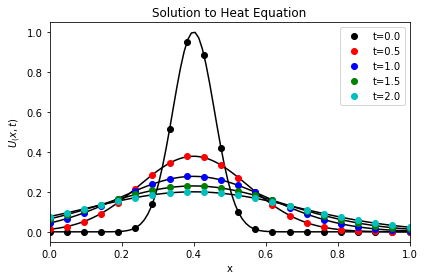

In [196]:
import math

def solve_heat_CN_2(m, kappa, L, t_0, t_final, U_0, g_0, g_1):
  
    delta_x = 1/float(m+1)
    
    N = 500
    t = numpy.linspace(t_0, t_final, N)
    delta_t = t[1] - t[0]

  
    # Solution array
    U = numpy.empty((len(t),m+2))

  
    # Initial and boundary conditions  
    U[0,:] = U_0
    U[0,0] = g_0(0)
    
    
    # Build solving matrix
    r = numpy.ones(m+2) * (kappa*delta_t) / (2.0 * delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    # Build matrix for the right hand side computation
    B = sparse.spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  m, m).tocsr()

    # Time stepping loop 
    for n in range(len(t)-1):
        # Construct right-hand side
        b = B.dot(U[n,:][1:-1])
        b[0] += kappa*delta_t / (2.0 * delta_x**2) * (g_0(t[n]) + g_0(t[n+1]))
        b[-1] += kappa*delta_t / (2.0 * delta_x**2) * (g_1(t[n]) + g_1(t[n+1]))
        
        # Solve system
        U[n+1,:][1:-1] = linalg.spsolve(A,b)
        U[n+1, 0] = g_0(t[n+1]) 
        U[n+1, -1] = g_1(t[n+1]) 
    
    return U[n+1,:]

#Plot

beta = 150.0
kappa = 0.02
L = 1.0
u_true = lambda x, t: numpy.exp(-(x - 0.4)**2. / (4.0 * kappa * t + 1.0 / beta)) \
                                            / numpy.sqrt(4.0 * kappa * beta * t + 1.0)
g_0 = lambda t: u_true(0.0, t)
g_1 = lambda t: u_true(L, t)

# Discretization and output times
m = 20
x = numpy.linspace(0.0, L, m + 2)
x_fine = numpy.linspace(0.0, L, 100)
delta_x = L / float(m + 1)
output_times = (0.0, 0.5, 1.0, 1.5, 2.0)

# Solve
U_CN = numpy.empty((len(output_times), m + 2))
U_CN[0, :] = u_true(x, 0.0)
for (n, t) in enumerate(output_times[1:]):
    U_CN[n + 1, :] = solve_heat_CN_2(m, kappa, L, output_times[n], t, U_CN[n, :], g_0, g_1)


# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes_CN = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_CN.plot(x_fine, u_true(x_fine, t), 'k-')
    axes_CN.plot(x, U_CN[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_CN.set_xlabel("x")
    axes_CN.set_ylabel("$U_(x,t)$")
    axes_CN.set_title("Solution to Heat Equation")
    axes_CN.set_xlim([0, L])
    axes_CN.legend()

plt.tight_layout()
plt.show()

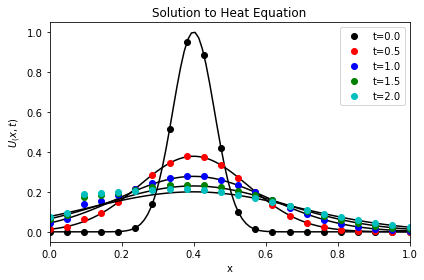

In [199]:
import math

def solve_heat_CN_3(m, kappa, L, t_0, t_final, U_0, g_0, g_1):
  
    delta_x = 1/float(m+1)
    
    N = 500
    t = numpy.linspace(t_0, t_final, N)
    delta_t = t[1] - t[0]

  
    # Solution array
    U = numpy.empty((len(t),m+2))

  
    # Initial and boundary conditions  
    U[0,:] = U_0
    U[0,0] = g_0(0)
    U[0,-1] = g_1(0)
    g_2 = lambda t: u_true(delta_x, t)
    U[0,1] = g_2(0)
    
    
    # Build solving matrix
    r = numpy.ones(m+2) * (kappa*delta_t) / (2.0 * delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    # Build matrix for the right hand side computation
    B = sparse.spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  m, m).tocsr()

    # Time stepping loop 
    for n in range(len(t)-1):
        # Construct right-hand side
        b = B.dot(U[n,:][1:-1])
        b[0] += kappa*delta_t / (2.0 * delta_x**2) * (g_0(t[n]) + g_0(t[n+1]))
        b[-1] += kappa*delta_t / (2.0 * delta_x**2) * (g_1(t[n]) + g_1(t[n+1]))
        b[1] += kappa*delta_t / (2.0 * delta_x**2) * (g_2(t[n]) + g_2(t[n+1]))
        
        # Solve system
        U[n+1,:][1:-1] = linalg.spsolve(A,b)
        U[n+1, 0] = g_0(t[n+1]) 
        U[n+1, -1] = g_1(t[n+1])
        U[n+1, 1] = g_2(t[n+1]) 
    
    return U[n+1,:]

#Plot

beta = 150.0
kappa = 0.02
L = 1.0
u_true = lambda x, t: numpy.exp(-(x - 0.4)**2. / (4.0 * kappa * t + 1.0 / beta)) \
                                            / numpy.sqrt(4.0 * kappa * beta * t + 1.0)
g_0 = lambda t: u_true(0.0, t)
g_1 = lambda t: u_true(L, t)

# Discretization and output times
m = 20
x = numpy.linspace(0.0, L, m + 2)
x_fine = numpy.linspace(0.0, L, 100)
delta_x = L / float(m + 1)
output_times = (0.0, 0.5, 1.0, 1.5, 2.0)

# Solve
U_CN = numpy.empty((len(output_times), m + 2))
U_CN[0, :] = u_true(x, 0.0)
for (n, t) in enumerate(output_times[1:]):
    U_CN[n + 1, :] = solve_heat_CN_3(m, kappa, L, output_times[n], t, U_CN[n, :], g_0, g_1)


# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes_CN = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_CN.plot(x_fine, u_true(x_fine, t), 'k-')
    axes_CN.plot(x, U_CN[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_CN.set_xlabel("x")
    axes_CN.set_ylabel("$U_(x,t)$")
    axes_CN.set_title("Solution to Heat Equation")
    axes_CN.set_xlim([0, L])
    axes_CN.legend()

plt.tight_layout()
plt.show()

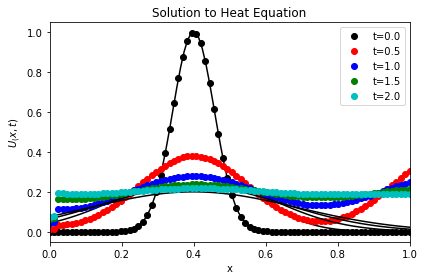

In [201]:
def solve_heat_BE_2(m, kappa, L, t_0, t_final, U_0, g_0, g_1):
    """Solve the heat equation using backward Euler and given boundaries
    
    Function will take the necessary number of time steps to reach t_final
    from t_0.  Note that this may mean taking a slightly smaller time step 
    size to hit t_f exactly.
    
    :Input:
     - *m* (int) Number of points use to discretize the domain.  Note that
       the total number of points is *m+1*.
     - *kappa* (float) Diffusion coefficient
     - *L* (float) Length of half of the domain
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0, should be m+1
     - *g_0* (func) Boundary condition at x=0
     - *g_1* (func) Boundary condition at x=L
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.  Note that this vector should m+1
    """
    # YOUR CODE HERE
    delta_x = L / float(m+1)
    
    # generate time mesh
    C = 0.5
    delta_t = C * delta_x
    t = numpy.arange(t_0, t_final, delta_t)
    
    #Time Step
    time_step = math.ceil((t_final - t_0)/delta_t)
    t = numpy.linspace(t_0, t_final, time_step)
    delta_t = t[1] - t[0]

    # Solution array & IC & BC
    U = numpy.empty((len(t), m+2))
    U[0, :] = U_0
    
    r = numpy.ones(m) * (kappa*delta_t) / (delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()
    
    g_2 = lambda t: u_true(delta_x, t)

    # Time stepping loop
    for n in range(len(t) - 1):
    
        b = U[n, :][1:-1]
        
        #BC
        bc1 = g_0(t[n+1])
        bc2 = g_1(t[n+1])
        bc3 = g_2(t[n+1])
        
        # correct U_n with BCs at ends
        b[0] += (kappa*delta_t) / (delta_x**2) * bc1
        b[-1] += (kappa*delta_t) / (delta_x**2) * bc2
        b[1 ] += (kappa*delta_t) / (delta_x**2) * bc3
        
        # solve
        U[n+1, :][1:-1] = linalg.spsolve(A, b)
        U[n+1, 0] = bc1 
        U[n+1, -1] = bc2 
        U[n+1, 1] = bc3
    
    return U[n+1, :]

beta = 150.0
kappa = 0.02
L = 1.0
u_true = lambda x, t: numpy.exp(-(x - 0.4)**2. / (4.0 * kappa * t + 1.0 / beta)) \
                                            / numpy.sqrt(4.0 * kappa * beta * t + 1.0)
g_0 = lambda t: u_true(0.0, t)
g_1 = lambda t: u_true(L/2, t)

# Discretization and output times
m = 80
x = numpy.linspace(0.0, L, m + 2)
x_fine = numpy.linspace(0.0, L, 100)
delta_x = L / float(m + 1)
output_times = (0.0, 0.5, 1.0, 1.5, 2.0)

# Solve
U_BE = numpy.empty((len(output_times), m + 2))
U_BE[0, :] = u_true(x, 0.0)
for (n, t) in enumerate(output_times[1:]):
    U_BE[n + 1, :] = solve_heat_BE_2(m, kappa, L, output_times[n], t, U_BE[n, :], g_0, g_1)

# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes_BE = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_BE.plot(x_fine, u_true(x_fine, t), 'k-')
    axes_BE.plot(x, U_BE[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_BE.set_xlabel("x")
    axes_BE.set_ylabel("$U_(x,t)$")
    axes_BE.set_title("Solution to Heat Equation")
    axes_BE.set_xlim([0, L])
    axes_BE.legend()
    
plt.tight_layout()
plt.show()

In [ ]:
def solve_heat_BE_3(m, kappa, L, t_0, t_final, U_0, g_0, g_1):
    """Solve the heat equation using backward Euler and given boundaries
    
    Function will take the necessary number of time steps to reach t_final
    from t_0.  Note that this may mean taking a slightly smaller time step 
    size to hit t_f exactly.
    
    :Input:
     - *m* (int) Number of points use to discretize the domain.  Note that
       the total number of points is *m+1*.
     - *kappa* (float) Diffusion coefficient
     - *L* (float) Length of half of the domain
     - *t_0* (float) Starting time
     - *t_final* (float) Time to integrate to
     - *U_0* (numpy.ndarray) Initial condition at time t_0, should be m+1
     - *g_0* (func) Boundary condition at x=0
     - *g_1* (func) Boundary condition at x=L
     
    :Output:
     - (numpy.ndarray) Solution at time t_final.  Note that this vector should m+1
    """
    # YOUR CODE HERE
    delta_x = L / float(m+1)
    
    # generate time mesh
    C = 0.5
    delta_t = C * delta_x
    t = numpy.arange(t_0, t_final, delta_t)
    
    #Time Step
    time_step = math.ceil((t_final - t_0)/delta_t)
    t = numpy.linspace(t_0, t_final, time_step)
    delta_t = t[1] - t[0]

    # Solution array & IC & BC
    U = numpy.empty((len(t), m+2))
    U[0, :] = U_0
    
    r = numpy.ones(m) * (kappa*delta_t) / (delta_x**2)
    A = sparse.spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], m, m).tocsr()

    # Time stepping loop
    for n in range(len(t) - 1):
    
        b = U[n, :][1:-1]
        
        #BC
        bc1 = g_0(t[n+1])
        bc2 = g_1(t[n+1])
        
        # correct U_n with BCs at ends
        b[0] += (kappa*delta_t) / (delta_x**2) * bc1
        b[-1] += (kappa*delta_t) / (delta_x**2) * bc2
        
        # solve
        U[n+1, :][1:-1] = linalg.spsolve(A, b)
        U[n+1, 0] = bc1 
        U[n+1, -1] = bc2 
    
    return U[n+1, :]

beta = 150.0
kappa = 0.02
L = 1.0
u_true = lambda x, t: numpy.exp(-(x - 0.4)**2. / (4.0 * kappa * t + 1.0 / beta)) \
                                            / numpy.sqrt(4.0 * kappa * beta * t + 1.0)
g_0 = lambda t: u_true(0.0, t)
g_1 = lambda t: u_true(L/2, t)

# Discretization and output times
m = 80
x = numpy.linspace(0.0, L, m + 2)
x_fine = numpy.linspace(0.0, L, 100)
delta_x = L / float(m + 1)
output_times = (0.0, 0.5, 1.0, 1.5, 2.0)

# Solve
U_BE = numpy.empty((len(output_times), m + 2))
U_BE[0, :] = u_true(x, 0.0)
for (n, t) in enumerate(output_times[1:]):
    U_BE[n + 1, :] = solve_heat_BE_3(m, kappa, L, output_times[n], t, U_BE[n, :], g_0, g_1)

# Plot some of the results
colors = ['k', 'r', 'b', 'g', 'c']
fig = plt.figure()
axes_BE = fig.add_subplot(1, 1, 1)
for (n, t) in enumerate(output_times):
    axes_BE.plot(x_fine, u_true(x_fine, t), 'k-')
    axes_BE.plot(x, U_BE[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
    axes_BE.set_xlabel("x")
    axes_BE.set_ylabel("$U_(x,t)$")
    axes_BE.set_title("Solution to Heat Equation")
    axes_BE.set_xlim([0, L])
    axes_BE.legend()
    
plt.tight_layout()
plt.show()